# PROJETO 1

Aluno: Pedro Paulo Mendonça Telho

### INTRODUÇÃO: 

A ideia principal do projeto é tentar relacionar como o acesso da população ao saneamento básico e os indicadores de natalidade de uma população influenciam no desenvolvimento dos países.

### ANÁLISE: 

# Como os dados sobre natalidade e saneamento básico influenciam para que alguns países tenham o IDH muito elevado?

1°passo: Importa-se os arquivos dos dados de excel da plataforma https://www.gapminder.org/data/

In [89]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

dados_idh = pd.read_excel('HDI.xlsx')
dados_fertility = pd.read_excel('fertility.xlsx')
dados_access_sanitation = pd.read_excel('improved_sanitation.xlsx')

In [90]:
dados_idh.head()

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


2°passo: selecionar um ano para análise de dados referentes ao IDH dos países

In [91]:
idh = dados_idh[[2010, 'geo']]
idh_organizado = idh.sort_values(by=2010, ascending=True)
idh = idh_organizado.set_index('geo')

3°passo:  organizar os dados para posteriormente agrupá-los em apenas um Dataframe.

In [92]:
fertility = dados_fertility[[2010, 'Total fertility rate']]
fert_organizado = fertility.sort_values(by=2010, ascending=True)
fert_organizado.columns = [2010, 'geo']
fert = fert_organizado.set_index('geo')

sanitation = dados_access_sanitation[['2010', 'Proportion of the population using improved sanitation facilities, total']]
sanitation_organizado = sanitation.sort_values(by='2010', ascending=True)
sanitation_organizado.columns = [2010, 'geo']
san = sanitation_organizado.set_index('geo')

4°passo: juntar os dados em apenas um Dataframe para realizar a análise.

In [93]:
listaf = idh.join(fert, how='inner', lsuffix='_idh', rsuffix='_quantidade_de_filhos_por_mãe')
lista_final = listaf.join(san, how='inner')
lista_final.columns = ['2010_idh', '2010_quantidade_de_filhos_por_mãe', '2010_porcentagem_da_populacao_com_acesso_a_saneamento_basico']
lista_final.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
lista_final.head()


,2010_idh,2010_quantidade_de_filhos_por_mãe,2010_porcentagem_da_populacao_com_acesso_a_saneamento_basico
geo,,,
Afghanistan,0.454,5.66,37.0
Albania,0.738,1.74,94.0
Algeria,0.724,2.82,95.0
Angola,0.495,6.22,58.0
Armenia,0.729,1.55,90.0


### EXPLICAÇÃO DE DADOS:

PRIMEIRO HISTOGRAMA


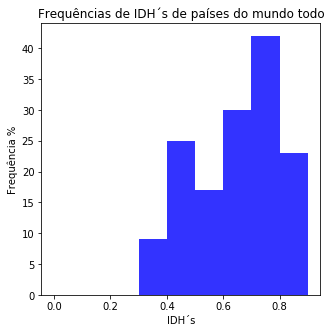

SEGUNDO HISTOGRAMA


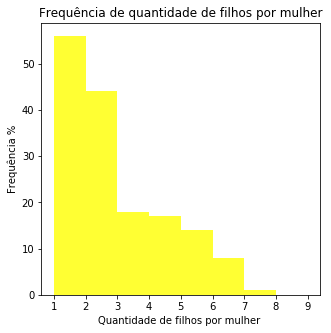

TERCEIRO HISTOGRAMA


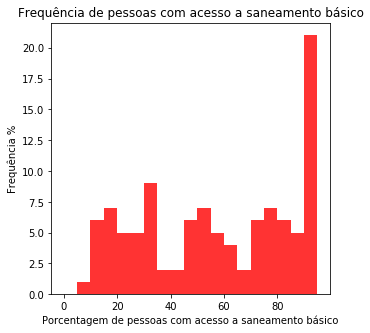

In [94]:
import numpy as np

faixa_idh = np.arange(0, 1, 0.1)
intervalos = pd.cut(lista_final['2010_idh'], bins=faixa_idh)
intervalos.value_counts(sort=False, normalize=True)*100

faixa_natalidade = range(1,10,1)
intervalos_natalidade = pd.cut(lista_final['2010_quantidade_de_filhos_por_mãe'], bins=faixa_natalidade)
intervalos_natalidade.value_counts(sort=False, normalize=True)*100

faixa_sanitation = range(0,100,5)
intervalos_sanitation = pd.cut(lista_final['2010_porcentagem_da_populacao_com_acesso_a_saneamento_basico'], bins=faixa_sanitation)
intervalos_sanitation.value_counts(sort=False, normalize=True)


plot = lista_final['2010_idh'].plot.hist(bins=faixa_idh,title='Frequências de IDH´s de países do mundo todo', figsize=(5, 5), alpha=0.8, color = 'blue')
plt.ylabel('Frequência %')
plt.xlabel('IDH´s')
print('PRIMEIRO HISTOGRAMA')
plt.show()

plot2 = lista_final['2010_quantidade_de_filhos_por_mãe'].plot.hist(bins=faixa_natalidade, title='Frequência de quantidade de filhos por mulher', figsize=(5,5), alpha=0.8, color='yellow')
plt.ylabel('Frequência %')
plt.xlabel('Quantidade de filhos por mulher ')
print('SEGUNDO HISTOGRAMA')
plt.show()

plot3 = lista_final['2010_porcentagem_da_populacao_com_acesso_a_saneamento_basico'].plot.hist(bins=faixa_sanitation, title='Frequência de pessoas com acesso a saneamento básico', figsize=(5,5), alpha=0.8, color='red')
plt.ylabel('Frequência %')
plt.xlabel('Porcentagem de pessoas com acesso a saneamento básico')
print('TERCEIRO HISTOGRAMA')
plt.show()


Nos histogramas acima é possível perceber assimetria para a frequência dos dados analisados. Por isso, devemos realizar uma análise mais rebuscada a respeito de como as variáveis podem se relacionar.

In [95]:
print(lista_final.describe())

         2010_idh  2010_quantidade_de_filhos_por_mãe  \
count  158.000000                         158.000000   
mean     0.668304                           3.007089   
std      0.160668                           1.521557   
min      0.323000                           1.240000   
25%      0.529250                           1.840000   
50%      0.700000                           2.490000   
75%      0.786500                           4.030000   
max      0.939000                           7.580000   

       2010_porcentagem_da_populacao_com_acesso_a_saneamento_basico  
count                                         158.000000             
mean                                           71.000000             
std                                            30.412032             
min                                             9.000000             
25%                                            47.250000             
50%                                            83.500000             
75%  

É possível perceber que a média mundial dos IDH's de 2010 foi igual a aproximadamente 0.67 o que não caracteriza um mundo tão desenvolvido, já que essa média deveria estar próxima de 1. Além disso, nesse ano, caracteriza-se uma média de 3 filhos por mulher e 71% da população mundial com acesso a saneamento básico.

Analisaremos agora gráficos de dispersão das variáveis em relação aos IDH's dos países e posteriormente analisaremos gráficos apenas das variáveis se relacionando entre si a fim de encontrar um padrão para o modelo estudado.

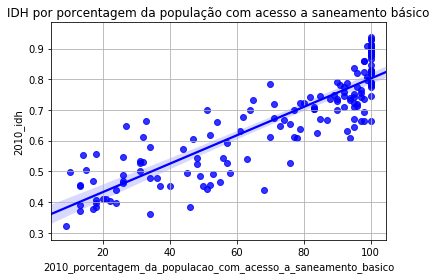

R = 0.8736916177529239


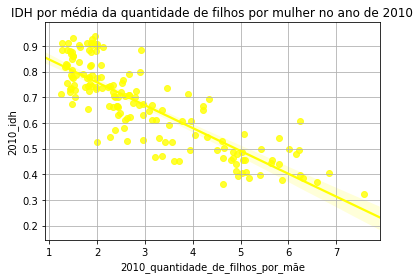

R = -0.8436188732811685


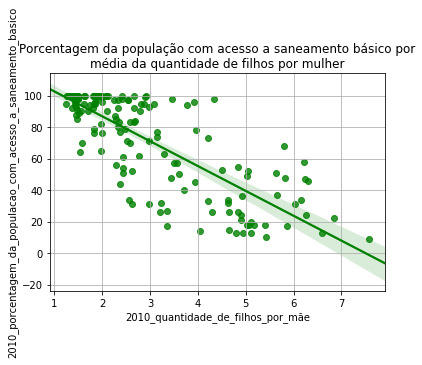

R = -0.7905229335310195


In [96]:
import seaborn as sns

graph1 = sns.regplot(lista_final['2010_porcentagem_da_populacao_com_acesso_a_saneamento_basico'], lista_final['2010_idh'], color='blue')
plt.title('IDH por porcentagem da população com acesso a saneamento básico')
plt.grid(True)
plt.show()
print('R = ' + str(lista_final.corr()['2010_porcentagem_da_populacao_com_acesso_a_saneamento_basico']['2010_idh']))

graph2 = sns.regplot(lista_final['2010_quantidade_de_filhos_por_mãe'], lista_final['2010_idh'], color='yellow')
plt.title('IDH por média da quantidade de filhos por mulher no ano de 2010')
plt.grid(True)
plt.show()
print('R = ' + str(lista_final.corr()['2010_quantidade_de_filhos_por_mãe']['2010_idh']))

graph3 = sns.regplot(lista_final['2010_quantidade_de_filhos_por_mãe'], lista_final['2010_porcentagem_da_populacao_com_acesso_a_saneamento_basico'], color='green')
plt.title('Porcentagem da população com acesso a saneamento básico por\n''média da quantidade de filhos por mulher')
plt.grid(True)
plt.show()
print('R = ' + str(lista_final.corr()['2010_porcentagem_da_populacao_com_acesso_a_saneamento_basico']['2010_quantidade_de_filhos_por_mãe']))


Os gráficos acima apresentam os valores em dispersão. Além disso, os valores de R representam os coeficientes de correlação  das variáveis em cada gráfico que foram calculados através da função DataFrame.corr() e que quanto mais próximos de 1 ou -1 demonstram o aumento de nível de dependência entre elas.

Quando analisamos as duas variáveis em estudo em relação ao IDH percebemos que os sinais de correlação são inversos. A correlação da porcentagem da população que possui acesso a saneamento básico é positiva enquanto que a correlação da quantidade de filhos por mulher é negativa. Podemos então iterar a respeito do estudo, seria então uma análise verdadeiramente de fatores inversos? Quanto menos filhos, maior seria o acesso a saneamento básico e portanto o IDH seria mais alto? 

Para compravar o padrão de comportamento dos gráficos de dispersão acima serão feitas análises temporais das variáveis.

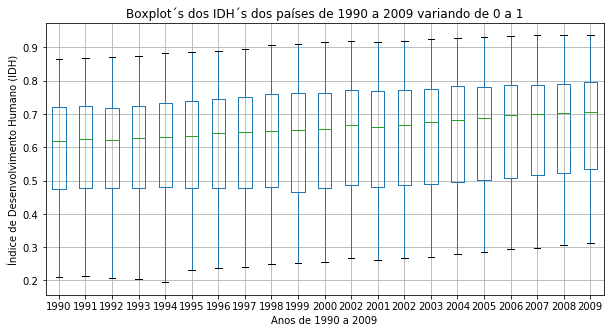

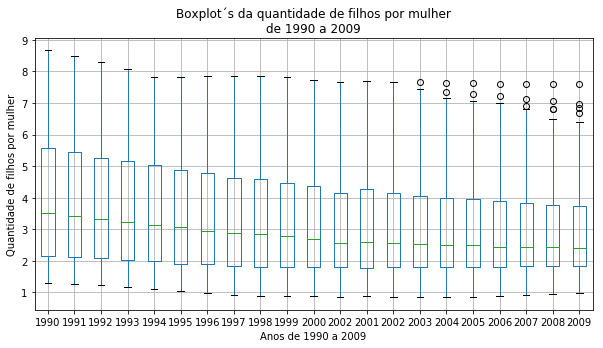

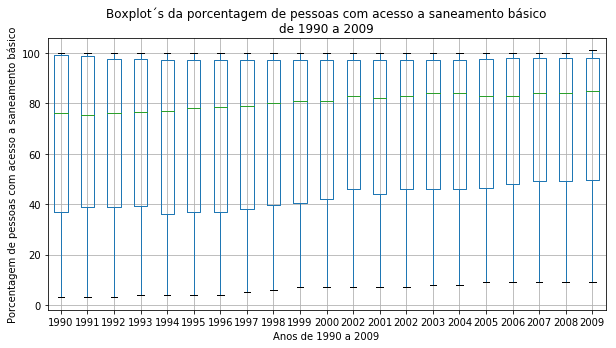

In [97]:
boxplot_idh = boxplot = dados_idh.boxplot(column=[1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2002,2001,2002,2003,2004,2005,2006,2007,2008,2009], figsize=(10,5))
plt.xlabel('Anos de 1990 a 2009')
plt.ylabel('Índice de Desenvolvimento Humano (IDH)')
plt.title('Boxplot´s dos IDH´s dos países de 1990 a 2009 variando de 0 a 1')
plt.show()

boxplot = dados_fertility.boxplot(column=[1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2002,2001,2002,2003,2004,2005,2006,2007,2008,2009], figsize=(10,5))
plt.xlabel('Anos de 1990 a 2009')
plt.ylabel('Quantidade de filhos por mulher')
plt.title('Boxplot´s da quantidade de filhos por mulher\n''de 1990 a 2009')
plt.show()

boxplot_sanitation = dados_access_sanitation.boxplot(column=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2002','2001','2002','2003','2004','2005','2006','2007','2008','2009'], figsize=(10,5))
plt.xlabel('Anos de 1990 a 2009')
plt.ylabel('Porcentagem de pessoas com acesso a saneamento básico')
plt.title('Boxplot´s da porcentagem de pessoas com acesso a saneamento básico\n''de 1990 a 2009')
plt.show()

Após analisar os gráficos acima, pode-se ter certeza de que as minhas variáveis indicam um crescimento ou decrescimento do IDH. É perceptível que quando temos um aumento da porcentagem de pessoas com acesso a saneamento básico e a quantidade de filhos por mulher reduz o Índice de Desenvolvimento Humano aumenta consideravelmente.

Importando o dataframe principal para formato csv:

In [101]:
lista_final.to_csv('dataframe.csv')

### CONCLUSÃO


Portanto, segundo minha análise pode-se concluir que a porcentagem da população com acesso a saneamento básico e a quantidade de filhos por mulher influenciam de alguma maneira o IDH dos países. Seguindo os padrões dos estudos, quanto menor a média de filhos por mulher uma população tiver e quanto maior a porcentagem da população com acesso a saneamento básico maior é o Índice de Desenvolvimento Humano desse país, se esses fatores se desenvolverem de forma contrária o IDH do país diminui.